In [44]:
import nibabel as nib
import numpy as np
from scipy.ndimage import zoom
import matplotlib.pyplot as plt

In [45]:
def z_score_mask(brain_image_path, mask_image_path):
    
    brain_image = nib.load(brain_image_path)
    mask_image = nib.load(mask_image_path)
    
    data1 = brain_image.get_fdata()
    data2 = mask_image.get_fdata()

    # Calculate the mean and standard deviation of brain image values within the mask region
    brain_values = data1[data2 > 0]
    mean_value = np.mean(brain_values)
    std_value = np.std(brain_values)

    # Calculate the Z-score for each pixel in the brain image
    z_score_image = (brain_image - mean_value) / std_value

    # Create a new NIfTI image with the Z-score normalized values
    normalized_image = nib.Nifti1Image(z_score_image, affine=brain_image.affine)

    return normalized_image

In [46]:
def z_score_mask2(brain_image_path, mask_image_path):
    
    brain_image = nib.load(brain_image_path)
    mask_image = nib.load(mask_image_path).get_fdata()

    brain_values = brain_image.get_fdata()[mask_image > 0]
    #brain_values = brain_image.get_fdata()[mask_image]
    mean_value = np.mean(brain_values)
    std_value = np.std(brain_values)

    # Calculate the Z-score for each pixel in the brain image
    z_score_image_data = (brain_image.get_fdata() - mean_value) / std_value

    # Create a new NIfTI image with the Z-score normalized values
    normalized_image = nib.Nifti1Image(z_score_image_data, affine=brain_image.affine)

    return normalized_image

In [47]:
def plot_combined_histogram(image1_path, image2_path, bins=50):
    # Load the MRI images
    image1 = nib.load(image1_path).get_fdata()
    image2 = nib.load(image2_path).get_fdata()

    filtered_values1 = image1[image1 >= 0]
    filtered_values2 = image2[image2 >= 0]

    min_value = min(np.min(filtered_values1), np.min(filtered_values2))
    max_value = max(np.max(filtered_values1), np.max(filtered_values2))

    plt.hist(filtered_values1.ravel(), bins=bins, range=(min_value, max_value), color='blue', alpha=0.5, label='Image 1')

    plt.hist(filtered_values2.ravel(), bins=bins, range=(min_value, max_value), color='red', alpha=0.5, label='Image 2')

    plt.title('Combined Histogram of Image 1 and Image 2 (Values >= 0)')
    plt.grid(True)
    
    plt.legend()

    plt.show()

In [66]:
def bland_altman_plot3(data1, data2, maskfile):
    downsample_factor=25
    image1 = nib.load(data1).get_fdata()[::downsample_factor,::downsample_factor,::downsample_factor]
    image2 = nib.load(data2).get_fdata()[::downsample_factor,::downsample_factor,::downsample_factor]
    mask = nib.load(maskfile).get_fdata()[::downsample_factor,::downsample_factor,::downsample_factor]
    
    mean = (image1 + image2) / 2
    diff = image1 - image2

    mean_diff = np.mean(diff)
    std_diff = np.std(diff, ddof=1)
    lower_limit = mean_diff - 1.96 * std_diff
    upper_limit = mean_diff + 1.96 * std_diff

    
    non_zero_diff = diff[diff != 0]

    #percent_non_zero_diff = len(non_zero_diff) / len(diff) * 100

    plt.figure(figsize=(8, 6))
    plt.scatter(mean[mask>0], diff[mask>0], c='b', alpha=0.5, s=30)
    plt.axhline(mean_diff, color='red', linestyle='--', linewidth=2)
    plt.axhline(lower_limit, color='green', linestyle='--', linewidth=1)
    plt.axhline(upper_limit, color='green', linestyle='--', linewidth=1)
    plt.xlabel('Moyenne des deux mesures')
    plt.ylabel('Différence entre les mesures')
    plt.title('Bland-Altman Plot')
    plt.grid(True)

    #plt.text(0.05, 0.1, f'Non-zero differences: {percent_non_zero_diff:.2f}%', transform=plt.gca().transAxes)
    
    # Show the plot
    plt.show()

In [68]:
def bland_altman_plot(data1, data2):
    
    image1 = nib.load(data1).get_fdata()
    image2 = nib.load(data2).get_fdata()
    
    mean = (image1 + image2) / 2
    diff = image1 - image2

    mean_diff = np.mean(diff)
    std_diff = np.std(diff, ddof=1)
    lower_limit = mean_diff - 1.96 * std_diff
    upper_limit = mean_diff + 1.96 * std_diff

    
    #non_zero_diff = diff[diff != 0]

    #percent_non_zero_diff = len(non_zero_diff) / len(diff) * 100

    plt.figure(figsize=(8, 6))
    plt.scatter(mean, diff, c='b', alpha=0.5, s=30)
    plt.axhline(mean_diff, color='red', linestyle='--', linewidth=2)
    plt.axhline(lower_limit, color='green', linestyle='--', linewidth=1)
    plt.axhline(upper_limit, color='green', linestyle='--', linewidth=1)
    plt.xlabel('Moyenne des deux mesures')
    plt.ylabel('Différence entre les mesures')
    plt.title('Bland-Altman Plot')
    plt.grid(True)

    #plt.text(0.05, 0.1, f'Non-zero differences: {percent_non_zero_diff:.2f}%', transform=plt.gca().transAxes)
    
    # Show the plot
    plt.show()

In [53]:
image_brain1="/NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Brains/CHU/Pat8_T1Gado_CHU_brain.nii.gz"
image_brain2="/NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Brains_Registered/COL_registred_on_CHU/Pat8_COL_registered.nii.gz"
image_mask1= "/NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Before_prettt_mask/CHU/Pat8_T1Gado_CHU_bet_mask.nii.gz"
image_mask2= "/NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Masks_Registered/COL_mask_registred/Pat8_COL_mask_registered.nii.gz"

In [54]:
normalized_image = z_score_mask2(image_brain1, image_mask1)
nib.save(normalized_image, "/NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Trash/normalized_image_mask_99.nii.gz")

In [55]:
normalized_image2 = z_score_mask2(image_brain2, image_mask2)
nib.save(normalized_image2, "/NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Trash/normalized_image_mask2_99.nii.gz")

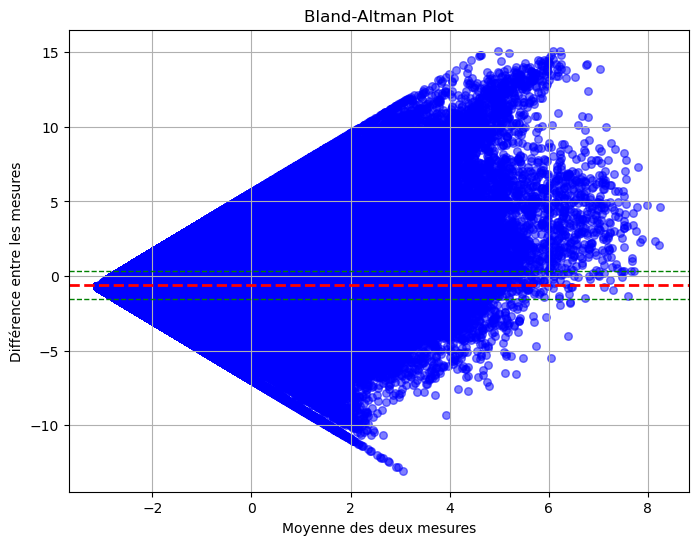

In [69]:
#bland_altman_plot("/NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Trash/normalized_image_mask_99.nii.gz", "/NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Trash/normalized_image_mask2_99.nii.gz","/NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Before_prettt_mask/CHU/Pat99_T1Gado_CHU_bet_mask.nii.gz")
bland_altman_plot("/NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Trash/normalized_image_mask_99.nii.gz", "/NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Trash/normalized_image_mask2_99.nii.gz")

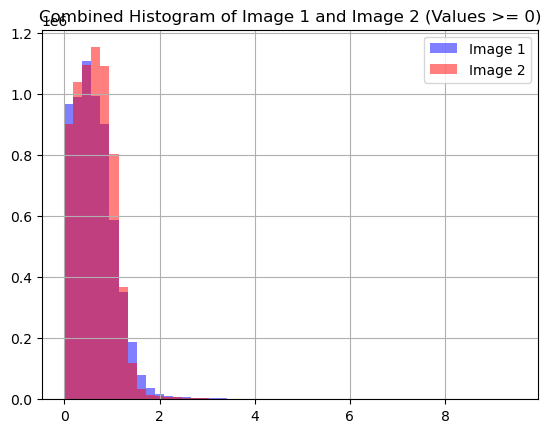

In [57]:
plot_combined_histogram("/NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Trash/normalized_image_mask.nii.gz", "/NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Trash/normalized_image_mask2.nii.gz")

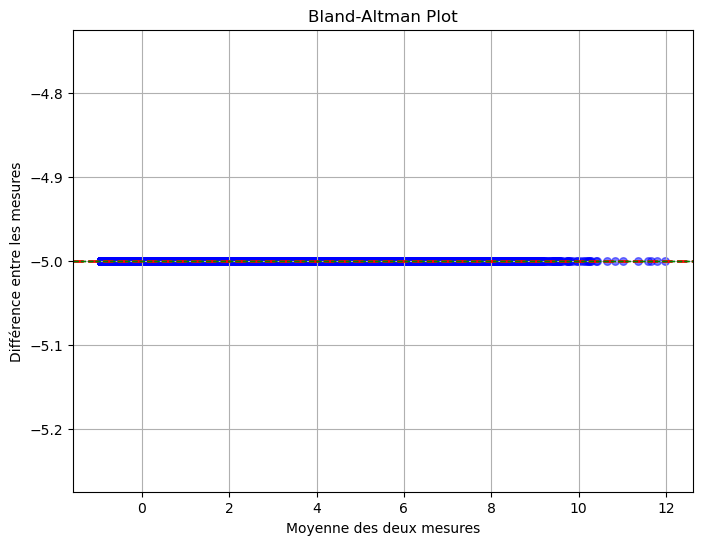

In [40]:
bland_altman_plot("/NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Trash/normalized_image_mask.nii.gz", "/NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/Trash/normalized_image_mask_test.nii.gz")